# Machine Learning : HW3

## Q5-Q6

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from pathlib import Path
from matplotlib import pyplot as plt

from hw4.logistic_code.logreg_skeleton import *

In [2]:
# Load data
path_to_data = Path("") / "hw4" / "logistic_code"
X_train = np.genfromtxt(path_to_data / "X_train.txt", delimiter=",")
mean, std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
y_train = np.genfromtxt(path_to_data / "y_train.txt", delimiter=",")

In [3]:
def standardize(arr):
    return (arr - mean) / std

# Normalize
X = standardize(X_train)
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)  # Add bias
y = y_train

## Q7

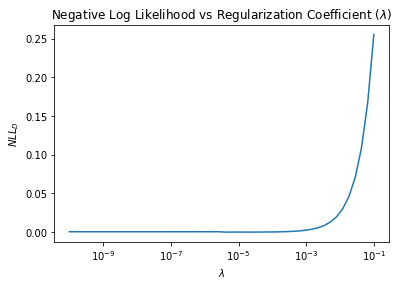

In [7]:
# Find optimal regularization param on validation data
X_val = np.genfromtxt(path_to_data / "X_val.txt", delimiter=",")
X_val = standardize(X_val)
X_val = np.concatenate((np.ones((X_val.shape[0], 1)), X_val), axis=1)  # Add bias
y_val = np.genfromtxt(path_to_data / "y_val.txt", delimiter=",")

reg_candidates = np.logspace(-10, -1, num=50)
val_losses, thetas = [], []

for reg in reg_candidates:
    theta = fit_logistic_reg(X, y, f_objective, reg)
    thetas.append(theta)
    val_losses.append(negative_log_likelihood(X_val, theta))

plt.plot(reg_candidates, val_losses)
plt.xscale("log")
plt.xlabel(r"$\lambda$")
plt.ylabel("$NLL_{D}$")
plt.title("Negative Log Likelihood vs Regularization Coefficient ($\lambda$)")
plt.savefig("nll_lambda.pdf")

In [5]:
# Find l2 regularization param for optimal loss
print(reg_candidates[::-1][val_losses.index(min(val_losses[::-1]))])

4.7148663634573897e-07


## Q8

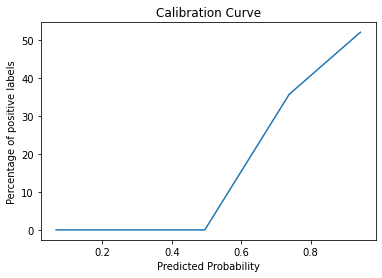

In [6]:
from sklearn.calibration import calibration_curve

optimal_theta = thetas[val_losses.index(min(val_losses))]

y_prob = np.exp(-log_inv_sigmoid(X_val @ optimal_theta))

fraction_of_positives, mean_predicted_value = calibration_curve(y_val, y_prob, n_bins=5, normalize=True)
plt.plot(mean_predicted_value, [100* i for i in fraction_of_positives])
plt.title("Calibration Curve")
plt.xlabel("Predicted Probability")
plt.ylabel("Percentage of positive labels")
plt.show()